In [4]:
! pip install bettermdptools

import gymnasium as gym
import numpy as np
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.plots import Plots
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.grid_search import GridSearch
import itertools
import matplotlib.pyplot as plt
import time

# 1 Grid World Q Learning

In [ ]:
# Q Learning function definition

In [5]:
def qtable(env, learning_rate, gamma, epsilon, num_episodes, ep_decay = 0.8):
    # Initialize Q-table
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))
    
    # Q-learning algorithm
    for episode in range(num_episodes):
        
        # Introducing epsilon greedy
        epsilon = epsilon*ep_decay
        
        state = env.reset()[0]
        done = False
#         print('episode = ', episode)

        while not done:
            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q[state])  # Exploit

            # Take action and observe next state and reward
            next_state, reward, terminating, x, probability = env.step(action)     
            
            if terminating is True and reward == 0:
                reward = -10
            elif terminating is True and reward == 1:
                reward = 10
            else:
                reward = -0.05

            # Update Q-value of current state-action pair
            Q[state][action] += learning_rate * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            # Update current state
            state = next_state
            
            if terminating is True:
                break
        
    return Q

In [4]:
# Grid search optimal hyperparameter: 
#     gamma = 0.9 
#     epsilon decay = 0.8  
#     num_episodes = 50000

sz = 4
# Start with a Grid Search to identify parameters
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
gamma=[.99,0.9,0.8]
epsilon_decay = [.9,.8,.7]
iters = [5000, 50000,500000]
GridSearch.q_learning_grid_search(frozen_lake, gamma, epsilon_decay, iters)

running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 5000


runtime = 1.66 seconds
Avg. episode reward:  0.89
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 50000


runtime = 16.89 seconds
Avg. episode reward:  0.97
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 500000


runtime = 158.29 seconds
Avg. episode reward:  0.96
###################
running q_learning with gamma: 0.99 epsilon decay: 0.8  iterations: 5000


runtime = 1.49 seconds
Avg. episode reward:  0.96
###################
running q_learning with gamma: 0.99 epsilon decay: 0.8  iterations: 50000


runtime = 15.33 seconds
Avg. episode reward:  0.95
###################
running q_learning with gamma: 0.99 epsilon decay: 0.8  iterations: 500000


runtime = 154.19 seconds
Avg. episode reward:  0.95
###################
running q_learning with gamma: 0.99 epsilon decay: 0.7  iterations: 5000


runtime = 1.75 seconds
Avg. episode reward:  0.9
###################
running q_learning with gamma: 0.99 epsilon decay: 0.7  iterations: 50000


runtime = 16.26 seconds
Avg. episode reward:  0.97
###################
running q_learning with gamma: 0.99 epsilon decay: 0.7  iterations: 500000


runtime = 177.86 seconds
Avg. episode reward:  0.96
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 5000


runtime = 1.72 seconds
Avg. episode reward:  0.92
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 50000


runtime = 16.29 seconds
Avg. episode reward:  0.99
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 500000


runtime = 154.94 seconds
Avg. episode reward:  0.89
###################
running q_learning with gamma: 0.9 epsilon decay: 0.8  iterations: 5000


runtime = 1.49 seconds
Avg. episode reward:  0.87
###################
running q_learning with gamma: 0.9 epsilon decay: 0.8  iterations: 50000


runtime = 15.24 seconds
Avg. episode reward:  1.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.8  iterations: 500000


runtime = 153.93 seconds
Avg. episode reward:  0.94
###################
running q_learning with gamma: 0.9 epsilon decay: 0.7  iterations: 5000


runtime = 1.74 seconds
Avg. episode reward:  0.88
###################
running q_learning with gamma: 0.9 epsilon decay: 0.7  iterations: 50000


runtime = 16.21 seconds
Avg. episode reward:  0.96
###################
running q_learning with gamma: 0.9 epsilon decay: 0.7  iterations: 500000


runtime = 163.86 seconds
Avg. episode reward:  0.95
###################
running q_learning with gamma: 0.8 epsilon decay: 0.9  iterations: 5000


runtime = 1.25 seconds
Avg. episode reward:  0.94
###################
running q_learning with gamma: 0.8 epsilon decay: 0.9  iterations: 50000


runtime = 14.01 seconds
Avg. episode reward:  0.87
###################
running q_learning with gamma: 0.8 epsilon decay: 0.9  iterations: 500000


runtime = 141.73 seconds
Avg. episode reward:  0.97
###################
running q_learning with gamma: 0.8 epsilon decay: 0.8  iterations: 5000


runtime = 1.72 seconds
Avg. episode reward:  0.9
###################
running q_learning with gamma: 0.8 epsilon decay: 0.8  iterations: 50000


runtime = 16.37 seconds
Avg. episode reward:  0.88
###################
running q_learning with gamma: 0.8 epsilon decay: 0.8  iterations: 500000


runtime = 165.48 seconds
Avg. episode reward:  0.93
###################
running q_learning with gamma: 0.8 epsilon decay: 0.7  iterations: 5000


runtime = 1.60 seconds
Avg. episode reward:  0.89
###################
running q_learning with gamma: 0.8 epsilon decay: 0.7  iterations: 50000


runtime = 17.23 seconds
Avg. episode reward:  0.87
###################
running q_learning with gamma: 0.8 epsilon decay: 0.7  iterations: 500000


runtime = 160.94 seconds
Avg. episode reward:  0.93
###################


In [5]:
# RUN THIS CELL

sz = 20
# Start with a Grid Search to identify parameters
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
gamma=[.99,0.9,0.8]
epsilon_decay = [.9,.8,.7]
iters = [5000, 50000,500000]
GridSearch.q_learning_grid_search(frozen_lake, gamma, epsilon_decay, iters)

running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 5000


runtime = 4.25 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 50000


runtime = 42.96 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 500000


runtime = 431.04 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.8  iterations: 5000


runtime = 4.34 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.8  iterations: 50000


runtime = 44.70 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.8  iterations: 500000


runtime = 903.37 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.7  iterations: 5000


runtime = 4.58 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.7  iterations: 50000


runtime = 45.34 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.7  iterations: 500000


runtime = 518.44 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 5000


runtime = 5.40 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 50000


runtime = 53.36 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 500000


runtime = 527.71 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.8  iterations: 5000


runtime = 5.29 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.8  iterations: 50000


runtime = 53.93 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.8  iterations: 500000


runtime = 471.37 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.7  iterations: 5000


runtime = 4.55 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.7  iterations: 50000


runtime = 46.66 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.9 epsilon decay: 0.7  iterations: 500000


runtime = 545.91 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.8 epsilon decay: 0.9  iterations: 5000


runtime = 5.37 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.8 epsilon decay: 0.9  iterations: 50000


runtime = 54.13 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.8 epsilon decay: 0.9  iterations: 500000


KeyboardInterrupt: 

In [72]:
for i in range(10,50000,100):
    sz = 4
    np.random.seed(42)

    gamma = 0.9 
    epsilon = 0.9  
    num_episodes = i
    learning_rate = 0.5

    if num_episodes == 10:
        iters = []
        reward_per_iter = []

    # Start with a Grid Search to identify parameters
    frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')

    print('Q Table generating', num_episodes, 'episodes')

    # Generating Q table
    Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)

    print('Q Table generated')

    # Evaluate policy
    total_rewards = []
    for episode in range(100):
        state = frozen_lake.reset()[0]
        done = False
        episode_reward = 0
    #         print('episode = ', episode)
        while not done:
            action = np.argmax(Q[state])
            # Take action and observe next state and reward
            next_state, reward, terminating, x, probability = frozen_lake.step(action) 

            if terminating is True and reward == 0:
                reward = -10
            elif terminating is True and reward == 1:
                reward = 10
            else:
                reward = -0.05

            episode_reward += reward
            state = next_state

            if terminating is True:
                break
    #         print(episode_reward)

        total_rewards.append(episode_reward)


    iters.append(num_episodes)
    reward_per_iter.append(np.mean(total_rewards))

Q Table generating 10 episodes
Q Table generated
Q Table generating 110 episodes
Q Table generated
Q Table generating 210 episodes
Q Table generated
Q Table generating 310 episodes
Q Table generated
Q Table generating 410 episodes
Q Table generated
Q Table generating 510 episodes
Q Table generated
Q Table generating 610 episodes
Q Table generated
Q Table generating 710 episodes
Q Table generated
Q Table generating 810 episodes
Q Table generated
Q Table generating 910 episodes
Q Table generated
Q Table generating 1010 episodes
Q Table generated
Q Table generating 1110 episodes
Q Table generated
Q Table generating 1210 episodes
Q Table generated
Q Table generating 1310 episodes
Q Table generated
Q Table generating 1410 episodes
Q Table generated
Q Table generating 1510 episodes
Q Table generated
Q Table generating 1610 episodes
Q Table generated
Q Table generating 1710 episodes
Q Table generated
Q Table generating 1810 episodes
Q Table generated
Q Table generating 1910 episodes
Q Table g

Q Table generated
Q Table generating 16110 episodes
Q Table generated
Q Table generating 16210 episodes
Q Table generated
Q Table generating 16310 episodes
Q Table generated
Q Table generating 16410 episodes
Q Table generated
Q Table generating 16510 episodes
Q Table generated
Q Table generating 16610 episodes
Q Table generated
Q Table generating 16710 episodes
Q Table generated
Q Table generating 16810 episodes
Q Table generated
Q Table generating 16910 episodes
Q Table generated
Q Table generating 17010 episodes
Q Table generated
Q Table generating 17110 episodes
Q Table generated
Q Table generating 17210 episodes
Q Table generated
Q Table generating 17310 episodes
Q Table generated
Q Table generating 17410 episodes
Q Table generated
Q Table generating 17510 episodes
Q Table generated
Q Table generating 17610 episodes
Q Table generated
Q Table generating 17710 episodes
Q Table generated
Q Table generating 17810 episodes
Q Table generated
Q Table generating 17910 episodes
Q Table gene

KeyboardInterrupt: 

Text(0.5, 1.0, 'Frozen Lake, 4x4')

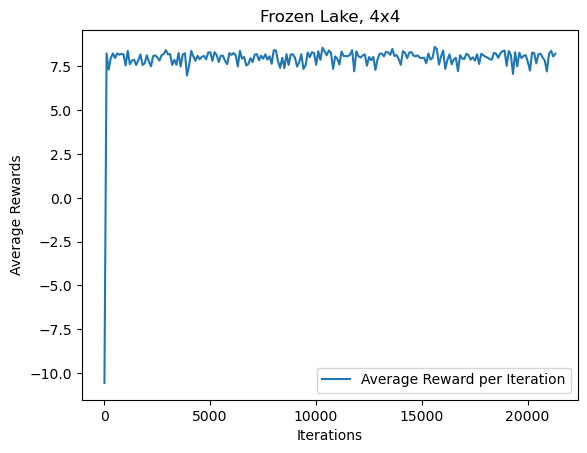

In [75]:
plt.plot(iters, reward_per_iter, label = f'Average Reward per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {4}x{4}')

In [5]:
for i in range(10,30000,1000):
    sz = 20
    np.random.seed(42)

    gamma = 0.9 
    epsilon = 0.9  
    num_episodes = i
    learning_rate = 0.5

    if num_episodes == 10:
        iters = []
        reward_per_iter = []
        q_values = []


    # Start with a Grid Search to identify parameters
    frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')

    print('Q Table generating', num_episodes, 'episodes')

    # Generating Q table
    Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)
    
    print('Q Table generated with the following average Q: ', np.mean(Q))

    # Evaluate policy
    total_rewards = []
    for episode in range(100):
        state = frozen_lake.reset()[0]
        done = False
        episode_reward = 0
    #         print('episode = ', episode)
        while not done:
            action = np.argmax(Q[state])
            # Take action and observe next state and reward
            next_state, reward, terminating, x, probability = frozen_lake.step(action) 

            if terminating is True and reward == 0:
                reward = -10
            elif terminating is True and reward == 1:
                reward = 10
            else:
                reward = -0.05

            episode_reward += reward
            state = next_state

            if terminating is True:
                break
    #         print(episode_reward)

        total_rewards.append(episode_reward)
    
    q_values.append(np.mean(Q))
    iters.append(num_episodes)
    reward_per_iter.append(np.mean(total_rewards))
    print(reward_per_iter[-1])

Q Table generating 10 episodes
Q Table generated with the following average Q:  -0.02750856015786583
-10.497
Q Table generating 1010 episodes


C:\Users\marcu\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Q Table generated with the following average Q:  -1.5573225150046952
-29.832499999999992
Q Table generating 2010 episodes
Q Table generated with the following average Q:  -2.047861763714973
-28.608500000000003
Q Table generating 3010 episodes
Q Table generated with the following average Q:  -2.163257880536589
-25.165499999999994
Q Table generating 4010 episodes
Q Table generated with the following average Q:  -2.495309132192137
-30.97449999999994
Q Table generating 5010 episodes
Q Table generated with the following average Q:  -2.465160277568804
-19.753000000000036
Q Table generating 6010 episodes
Q Table generated with the following average Q:  -2.482246736017593
-34.92049999999978
Q Table generating 7010 episodes
Q Table generated with the following average Q:  -2.557280948145359
-32.97749999999983
Q Table generating 8010 episodes
Q Table generated with the following average Q:  -2.7362876915779593
-24.635000000000012
Q Table generating 9010 episodes
Q Table generated with the follow

In [ ]:
print(Q)  

Text(0.5, 1.0, 'Frozen Lake, 20x20')

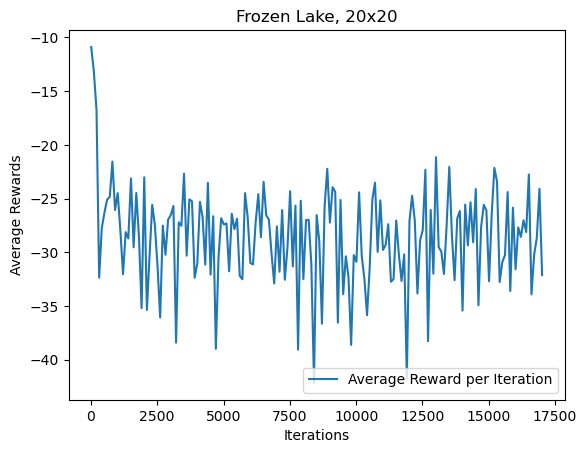

In [84]:
# Example plot of varied reward.
plt.plot(iters, reward_per_iter, label = f'Average Reward per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {20}x{20}')

Size charts - 4 to 28

Q Table generating 100 episodes
Q Table generating 200 episodes
Q Table generating 300 episodes
Q Table generating 400 episodes
Q Table generating 500 episodes
Q Table generating 100 episodes
Q Table generating 200 episodes
Q Table generating 300 episodes
Q Table generating 400 episodes
Q Table generating 500 episodes
Q Table generating 100 episodes
Q Table generating 200 episodes
Q Table generating 300 episodes
Q Table generating 400 episodes
Q Table generating 500 episodes
Q Table generating 100 episodes
Q Table generating 200 episodes
Q Table generating 300 episodes
Q Table generating 400 episodes
Q Table generating 500 episodes
Q Table generating 100 episodes
Q Table generating 200 episodes
Q Table generating 300 episodes
Q Table generating 400 episodes
Q Table generating 500 episodes
Q Table generating 100 episodes
Q Table generating 200 episodes
Q Table generating 300 episodes
Q Table generating 400 episodes
Q Table generating 500 episodes


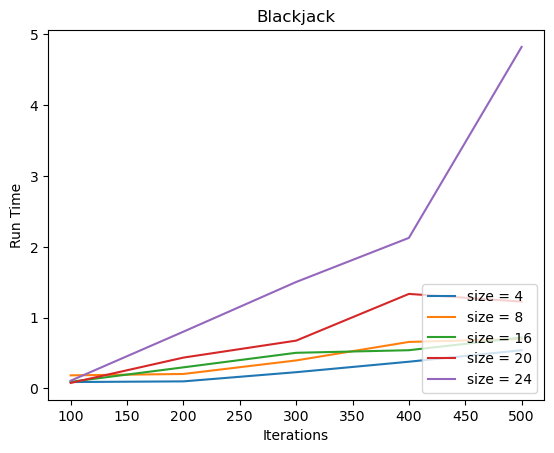

In [28]:

for s in range(4,28,4):
    list_x = []
    run_time_per_iter =[]

    for x in range(100,600,100):

        gamma = 0.9 
        epsilon = 0.9  
        num_episodes = x
        learning_rate = 0.5

        start_time = time.time()

        np.random.seed(42)

        # Start with a Grid Search to identify parameters
        frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=s), is_slippery = True, render_mode = 'ansi')

        print('Q Table generating', num_episodes, 'episodes')

        # Generating Q table
        Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)

        end_time = time.time()

        elapsed_time = end_time-start_time

        run_time_per_iter.append(elapsed_time)
        list_x.append(x)
    if s != 12:
        plt.plot(list_x, run_time_per_iter, label = f'size = {s}')
plt.xlabel('Iterations')
plt.ylabel('Run Time')
plt.legend(loc = 'lower right')
plt.title(f'Blackjack')
plt.show()    


In [30]:
# Printing Final Policy

576


In [32]:
sz = 20
np.random.seed(42)

gamma = 0.9 
epsilon = 0.9  
num_episodes = 20000
learning_rate = 0.5

if num_episodes == 10:
    iters = []
    reward_per_iter = []
    q_values = []


# Start with a Grid Search to identify parameters
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()
print(frozen_lake.render())

print('Q Table generating', num_episodes, 'episodes')

# Generating Q table
Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)

print('Q Table generated with the following average Q: ', np.mean(Q))



SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

Q Table generating 20000 episodes
Q Table generated with the following average Q:  -3.1715228953500967


[[-0.5811828  -8.76039648 -5.         -1.39398324]
 [ 0.          0.          0.          0.        ]
 [-5.024375   -5.         -0.52404061 -5.0125    ]
 ...
 [-5.         -0.0375     -0.041875   -5.        ]
 [-0.025      -0.025      -5.          0.        ]
 [ 0.          0.          0.          0.        ]]


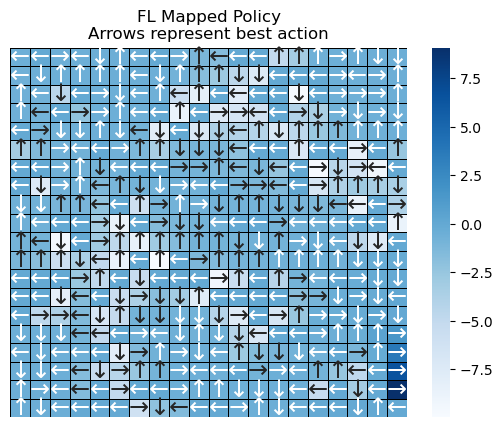

Total Run Time =  0.4230518341064453


In [39]:
start_time = time.time()
sz = 20
print(Q)
q_temp = np.argmax(Q,axis=1)
q_table = {time_step: action for time_step, action in enumerate(q_temp)}

# plot state values
size=(sz,sz)
# Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"
V = np.max(Q,axis=1)

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(q_table, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

In [44]:
# Evaluating policy
reward_per_iter = []
total_rewards = []
for episode in range(100):
    state = frozen_lake.reset()[0]
    done = False
    episode_reward = 0
#         print('episode = ', episode)
    while not done:
        action = np.argmax(Q[state])
        # Take action and observe next state and reward
        next_state, reward, terminating, x, probability = frozen_lake.step(action) 

        if terminating is True and reward == 0:
            reward = -10
        elif terminating is True and reward == 1:
            reward = 10
        else:
            reward = -0.05

        episode_reward += reward
        state = next_state

        if terminating is True:
            break
#         print(episode_reward)

    total_rewards.append(episode_reward)

    reward_per_iter.append(np.mean(total_rewards))
    print(total_rewards)

[-34.40000000000021]
[-34.40000000000021, -32.45000000000019]
[-34.40000000000021, -32.45000000000019, -35.80000000000023]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -17.10000000000025]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -17.10000000000025, -18.89999999999999]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -17.10000000000025, -18.89999999999999, -32.30000000000018]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -17.10000000000025, -18.89999999999999, -32.30000000000018, -6.8500000000001044]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -17.10000000000025, -18.89999999999999, -32.30000000000018, -6.8500000000001044, -11.8]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -17.1000000000

[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -17.10000000000025, -18.89999999999999, -32.30000000000018, -6.8500000000001044, -11.8, -21.100000000000023, -22.650000000000045, -24.800000000000075, -43.20000000000025, -14.299999999999994, -14.699999999999992, -12.549999999999999, -14.94999999999999, -13.849999999999994, -28.400000000000126, -54.44999999999961, -44.40000000000018, -111.1499999999964, -19.4, -55.099999999999575, -23.70000000000006, -34.40000000000021, -21.100000000000023, -17.59999999999998, -14.94999999999999, -23.80000000000006, -20.550000000000015, -65.99999999999895, -20.90000000000002, -23.850000000000062, -33.050000000000196, -30.10000000000015, -21.55000000000003, -16.299999999999986, -18.04999999999998, -37.400000000000254, -19.850000000000005, -21.150000000000023, -15.999999999999986, -21.50000000000003, -27.600000000000115, -59.34999999999933]
[-34.40000000000021, -32.45000000000019, -35.80000000000023, -28.100000000000122, -1

In [53]:
# What happens if is_slippery = False?
# Q learning will definitely be able to find the path - average reward is 8.15 (which is the shortest path to maximiz the reward)

sz = 20
np.random.seed(42)

gamma = 0.9 
epsilon = 0.9  
num_episodes = 20000
learning_rate = 0.5

if num_episodes == 10:
    iters = []
    reward_per_iter = []
    q_values = []


# Start with a Grid Search to identify parameters
 

print('Q Table generating', num_episodes, 'episodes')

# Generating Q table
Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)

print('Q Table generated with the following average Q: ', np.mean(Q))



SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

Q Table generating 20000 episodes
Q Table generated with the following average Q:  -0.7764043963981407


In [54]:
# Evaluating policy
reward_per_iter = []
total_rewards = []
for episode in range(100):
    state = frozen_lake.reset()[0]
    done = False
    episode_reward = 0
#         print('episode = ', episode)
    while not done:
        action = np.argmax(Q[state])
        # Take action and observe next state and reward
        next_state, reward, terminating, x, probability = frozen_lake.step(action) 

        if terminating is True and reward == 0:
            reward = -10
        elif terminating is True and reward == 1:
            reward = 10
        else:
            reward = -0.05

        episode_reward += reward
        state = next_state

        if terminating is True:
            break
#         print(episode_reward)

    total_rewards.append(episode_reward)

    reward_per_iter.append(np.mean(total_rewards))
    print(total_rewards)

[8.149999999999999]
[8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999]
[8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.149999999999999, 8.

[[-0.50583712 -7.50625    -5.0125     -5.0125    ]
 [ 0.          0.          0.          0.        ]
 [-5.024375   -5.024375   -0.50513742 -5.        ]
 ...
 [-5.         -0.060625   -0.58028648 -0.63254288]
 [-0.03625    -0.03625     0.          0.        ]
 [ 0.          0.          0.          0.        ]]


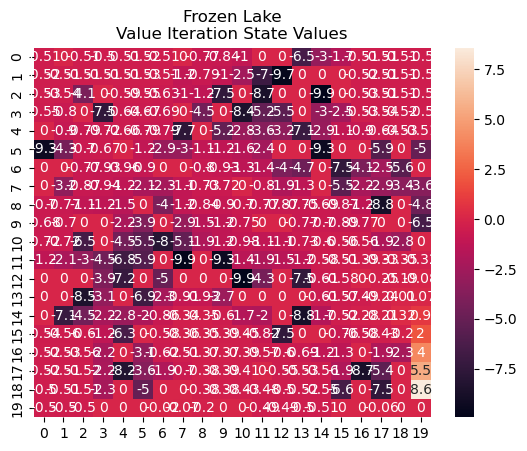

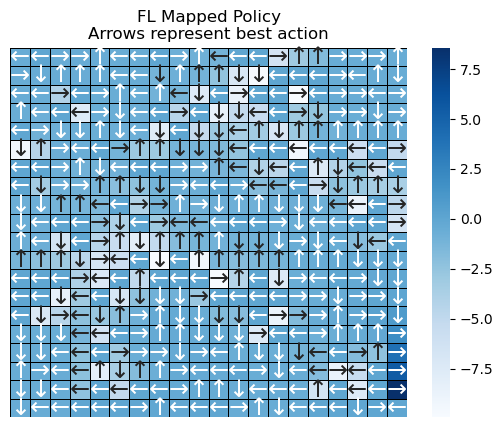

Total Run Time =  1.0307927131652832


In [71]:
start_time = time.time()
sz = 20
print(Q)
q_temp = np.argmax(Q,axis=1)
q_table = {time_step: action for time_step, action in enumerate(q_temp)}
V = np.max(Q,axis=1)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(q_table, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

In [ ]:
# Exploration vs Exploitation

In [ ]:
reward_per_iter = []

for i in range(0,4):
    
    # Training
    sz = 20
    np.random.seed(42)

    gamma = 0.9 
    epsilon = 0.9  
    num_episodes = 20000
    learning_rate = 0.5

    # Start with a Grid Search to identify parameters
    frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
    frozen_lake.reset()
    print(frozen_lake.render())

    print('Q Table generating', num_episodes, 'episodes')

    # Generating Q table
    Q = qtable(env = frozen_lake, learning_rate = 0.5, gamma = 0.9, epsilon = 0.9, num_episodes = 1000000, ep_decay = (0.8 - (i * 0.1)))

    print('Q Table generated with the following average Q: ', np.mean(Q))
    

    #Testing
    list_x = np.arange(0,50)
    total_rewards = []
    for episode in range(50):
        state = frozen_lake.reset()[0]
        done = False
        episode_reward = 0
    #         print('episode = ', episode)

        
        while not done:

            action = np.argmax(Q[state])
            # Take action and observe next state and reward
            next_state, reward, terminating, x, probability = frozen_lake.step(action) 

            if terminating is True and reward == 0:
                reward = -10
            elif terminating is True and reward == 1:
                reward = 10
            else:
                reward = -0.05

            episode_reward += reward
            state = next_state

            if terminating is True:
                break
    #         print(episode_reward)

        total_rewards.append(episode_reward)
    decay_rate = [0.8,0.6,0.4,0.2]
    plt.plot(list_x, total_rewards, label = f'Epsilon Decaying at rate of {decay_rate[i]}')

    reward_per_iter.append(np.mean(total_rewards))
    line_color = ['blue','orange','g','r']
    plt.axhline(reward_per_iter[-1], linestyle = '--', color = line_color[i] , label = f'Avg Reward: Decay Rate decaying at {decay_rate[i]}')

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake 20x20')
plt.show()


SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

Q Table generating 20000 episodes
Q Table generated with the following average Q:  -3.6029767776825565

SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

Q Table generating 20000 episodes


In [66]:
# print(reward_per_iter)
print(round(0.8 - (i * 0.2),2))

0.2


# 2 BlackJack Q Learning